In [27]:
from sklearn import tree
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#for Coin value
from pycoingecko import CoinGeckoAPI
import json
from pandas import json_normalize
cg = CoinGeckoAPI()
gecko_list = [
    "bitcoin",
    "ethereum",
    "dogecoin"
]

In [28]:
eth = pd.read_csv(os.path.join("data", "ethereum_cleaned.csv"))
eth = eth.rename(columns={"Datetime":"date"})
eth['date'] = pd.to_datetime(eth['date'])
eth['date'] = eth['date'].dt.strftime('%Y-%m-%d')
eth

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp
0,0,2022-05-01,"['eth', 'http', 'co', 'nolnum7c3k']",0.000,1.000,0.000,0.0000
1,1,2022-05-01,"['btc', 'xrp', 'xem', 'lisk', 'iost', 'sand', ...",0.000,0.725,0.275,0.5859
2,2,2022-05-01,"['eth', 'son', '3', 'dip', 'daha', 'yapacak', ...",0.000,1.000,0.000,0.0000
3,3,2022-05-01,"['tigray', 'emerg', 'famin', 'food', 'insecur'...",0.000,1.000,0.000,0.0000
4,4,2022-05-01,"['b', 'nu', 'binanc', 'live', 'nft', 'bnb', 'b...",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...
160011,160011,2022-05-15,"['good', 'morn', 'crowd', 'nice', 'sunday', 'n...",0.000,0.612,0.388,0.6908
160012,160012,2022-05-15,"['curat', 'coin', 'metric', 'everi', 'day', 'e...",0.000,1.000,0.000,0.0000
160013,160013,2022-05-15,"['pari', '3', '1', '1', '10eth', 'belong', 'tr...",0.000,1.000,0.000,0.0000
160014,160014,2022-05-15,"['woman', 'maiprisin', 'http', 'co', 'gkcg5g6d...",0.000,1.000,0.000,0.0000


In [29]:
eth_neg = eth[eth['negative'] > 0]
eth_pos = eth[eth['positive'] > 0]

In [30]:
eth_pos

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp
1,1,2022-05-01,"['btc', 'xrp', 'xem', 'lisk', 'iost', 'sand', ...",0.000,0.725,0.275,0.5859
6,6,2022-05-01,"['4', 'hour', 'top', 'mover', 'report', 'block...",0.000,0.913,0.087,0.2023
7,7,2022-05-01,"['degousdt', 'bear', 'alert', '5x', 'volum', '...",0.000,0.896,0.104,0.2960
9,9,2022-05-01,"['everyon', 'good', 'weekend', 'nftcommun', 'n...",0.000,0.707,0.293,0.4404
11,11,2022-05-01,"['look', 'next', 'earli', 'earli', 'discord', ...",0.122,0.766,0.113,-0.0516
...,...,...,...,...,...,...,...
160004,160004,2022-05-15,"['atom', 'short', 'alert', 'exchang', 'ftx', '...",0.000,0.941,0.059,0.2960
160005,160005,2022-05-15,"['uniqu', 'modern', 'win', 'win', 'trade', 'st...",0.000,0.648,0.352,0.8225
160009,160009,2022-05-15,"['bnb', 'long', 'alert', 'exchang', 'ftx', 'ma...",0.000,0.939,0.061,0.2960
160010,160010,2022-05-15,"['btc', 'long', 'alert', 'exchang', 'binanc', ...",0.000,0.919,0.081,0.2960


In [31]:
print(len(eth_neg))
print(len(eth_pos))

44434
59351


In [32]:
positive = eth_pos['cleaned']

from matplotlib import pyplot as plt
from wordcloud import WordCloud 

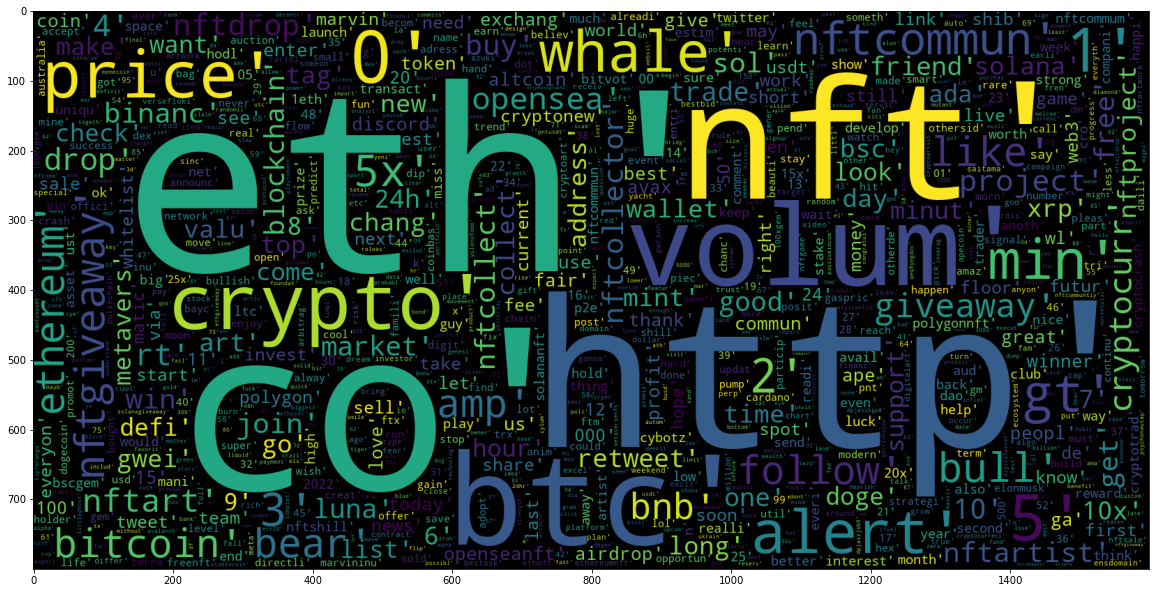

In [7]:
positive = eth_pos['cleaned']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(positive))
plt.imshow(wc)

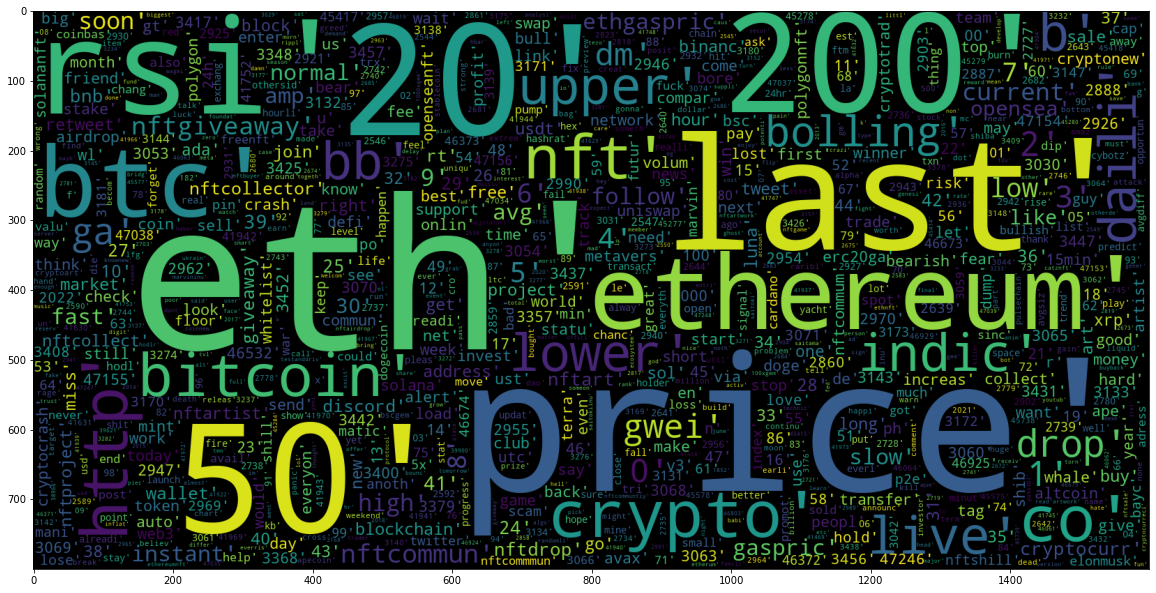

In [8]:
negative = eth_neg['cleaned']
plt.figure(figsize = (20,20))
wc2 = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative))
plt.imshow(wc2)

# This section is to extract the value of Ethereum (plus Dodge and Bitcoin)

In [33]:
cg = CoinGeckoAPI()

data = {}
for coin in gecko_list:
    try:
        nested_lists = cg.get_coin_market_chart_range_by_id(
            id=coin,vs_currency='aud',from_timestamp='1589807389',to_timestamp='1652879389'
        )["prices"]
        data[coin] = {}
        data[coin]["timestamps"], data[coin]["values"], = zip(*nested_lists)

    except Exception as e:
        print(e)
        print("coin: " + coin)

frame_list = [
    pd.DataFrame(data[coin]["values"],data[coin]["timestamps"], columns=[coin])
    for coin in gecko_list
    if coin in data
]

In [34]:
df_cryptocurrency = pd.concat(frame_list, axis=1)

In [35]:
df_cryptocurrency["datetime"] = pd.to_datetime(df_cryptocurrency.index, unit="ms")
df_cryptocurrency["date"] = df_cryptocurrency["datetime"].dt.date
df_cryptocurrency["hour"] = df_cryptocurrency["datetime"].dt.hour
df_cryptocurrency.dropna(inplace=True)

In [36]:
renamed= df_cryptocurrency.rename(columns={'bitcoin': 'bitcoin_price','ethereum': 'ethereum_price','dogecoin':'dogecoin_price','date': 'date'})

In [37]:
crypto = renamed.drop(['datetime', 'hour'], axis = 1)

In [45]:
crypto.reset_index(inplace=True)
crypto = crypto.drop(['index'], axis = 1)
crypto['date'] = pd.to_datetime(crypto['date'])
crypto['date'] = crypto['date'].dt.strftime('%Y-%m-%d')
crypto

,bitcoin_price,ethereum_price,dogecoin_price,date,Change ETH,ETH Up/Down
0,14884.979992,328.653136,0.003901,2020-05-19,NaN,0
1,14922.865925,326.538524,0.003891,2020-05-20,-2.114613,0
2,14452.798040,318.473767,0.003781,2020-05-21,-8.064757,0
3,13795.940128,302.899061,0.003681,2020-05-22,-15.574706,0
4,13971.494350,315.525952,0.003858,2020-05-23,12.626890,1
...,...,...,...,...,...,...
725,42267.741872,2898.843244,0.127568,2022-05-14,37.065846,1
726,43534.739233,2976.736395,0.129823,2022-05-15,77.893151,1
727,45069.769903,3089.689306,0.134079,2022-05-16,112.952912,1
728,42910.751665,2905.144652,0.126187,2022-05-17,-184.544654,0


In [46]:
crypto['Change ETH'] = crypto.ethereum_price - crypto.ethereum_price.shift(1)
crypto

,bitcoin_price,ethereum_price,dogecoin_price,date,Change ETH,ETH Up/Down
0,14884.979992,328.653136,0.003901,2020-05-19,NaN,0
1,14922.865925,326.538524,0.003891,2020-05-20,-2.114613,0
2,14452.798040,318.473767,0.003781,2020-05-21,-8.064757,0
3,13795.940128,302.899061,0.003681,2020-05-22,-15.574706,0
4,13971.494350,315.525952,0.003858,2020-05-23,12.626890,1
...,...,...,...,...,...,...
725,42267.741872,2898.843244,0.127568,2022-05-14,37.065846,1
726,43534.739233,2976.736395,0.129823,2022-05-15,77.893151,1
727,45069.769903,3089.689306,0.134079,2022-05-16,112.952912,1
728,42910.751665,2905.144652,0.126187,2022-05-17,-184.544654,0


In [47]:
crypto['ETH Up/Down'] = np.where(crypto['Change ETH']>0, 1, 0)
crypto

,bitcoin_price,ethereum_price,dogecoin_price,date,Change ETH,ETH Up/Down
0,14884.979992,328.653136,0.003901,2020-05-19,NaN,0
1,14922.865925,326.538524,0.003891,2020-05-20,-2.114613,0
2,14452.798040,318.473767,0.003781,2020-05-21,-8.064757,0
3,13795.940128,302.899061,0.003681,2020-05-22,-15.574706,0
4,13971.494350,315.525952,0.003858,2020-05-23,12.626890,1
...,...,...,...,...,...,...
725,42267.741872,2898.843244,0.127568,2022-05-14,37.065846,1
726,43534.739233,2976.736395,0.129823,2022-05-15,77.893151,1
727,45069.769903,3089.689306,0.134079,2022-05-16,112.952912,1
728,42910.751665,2905.144652,0.126187,2022-05-17,-184.544654,0


# Calculate the where the average sentiment overall per day was positive or negative and combine with the ETH table on price going up/down

In [52]:
eth_sentiment = eth.groupby('date')['comp'].mean()
eth_sentiment = eth_sentiment.reset_index()
eth_sentiment

,date,comp
0,2022-05-01,0.070634
1,2022-05-02,0.093398
2,2022-05-03,0.078131
3,2022-05-04,0.075955
4,2022-05-05,0.079205
5,2022-05-06,0.086177
6,2022-05-07,0.061135
7,2022-05-08,0.083538
8,2022-05-09,0.079939
9,2022-05-10,0.078844


In [53]:
eth_sentiment['Pos/Neg'] = np.where(eth_sentiment['comp']>0, 1, 0)

In [54]:
eth_sentiment_move = pd.merge(eth_sentiment, crypto,how='outer', on='date')

In [55]:
eth_sentiment_move.dropna(subset=['comp'])

,date,comp,Pos/Neg,bitcoin_price,ethereum_price,dogecoin_price,Change ETH,ETH Up/Down
0,2022-05-01,0.070634,1.0,53518.018858,3874.650573,0.180779,-112.235667,0
1,2022-05-02,0.093398,1.0,54531.860549,4008.085357,0.188247,133.434784,1
2,2022-05-03,0.078131,1.0,54709.645087,4059.288782,0.186066,51.203425,1
3,2022-05-04,0.075955,1.0,53180.614016,3921.344785,0.182778,-137.943997,0
4,2022-05-05,0.079205,1.0,54702.555595,4053.948028,0.187391,132.603243,1
5,2022-05-06,0.086177,1.0,51400.311798,3866.281839,0.180483,-187.666189,0
6,2022-05-07,0.061135,1.0,51026.289235,3814.224690,0.180969,-52.057149,0
7,2022-05-08,0.083538,1.0,50259.004275,3731.605078,0.180549,-82.619612,0
8,2022-05-09,0.079939,1.0,48329.555540,3571.264784,0.176215,-160.340294,0
9,2022-05-10,0.078844,1.0,43512.077206,3234.184510,0.151046,-337.080274,0


In [73]:
eth_clean = eth_sentiment_move.drop(columns=['bitcoin_price', 'dogecoin_price'])
eth_clean1 = eth_clean.dropna(subset=['comp'])

In [85]:
eth_clean1

,date,comp,Pos/Neg,ethereum_price,Change ETH,ETH Up/Down
0,2022-05-01,0.070634,1.0,3874.650573,-112.235667,0
1,2022-05-02,0.093398,1.0,4008.085357,133.434784,1
2,2022-05-03,0.078131,1.0,4059.288782,51.203425,1
3,2022-05-04,0.075955,1.0,3921.344785,-137.943997,0
4,2022-05-05,0.079205,1.0,4053.948028,132.603243,1
5,2022-05-06,0.086177,1.0,3866.281839,-187.666189,0
6,2022-05-07,0.061135,1.0,3814.224690,-52.057149,0
7,2022-05-08,0.083538,1.0,3731.605078,-82.619612,0
8,2022-05-09,0.079939,1.0,3571.264784,-160.340294,0
9,2022-05-10,0.078844,1.0,3234.184510,-337.080274,0


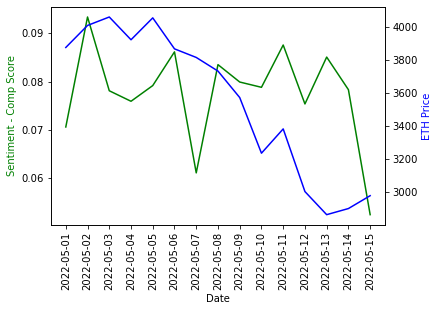

In [84]:
x = eth_clean1["date"]
y1 = eth_clean1["comp"]
y2 = eth_clean1["ethereum_price"]


fig, ax1 = plt.subplots()
plt.xticks(rotation = 90)
ax2 = ax1.twinx()


ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment - Comp Score', color='g')
ax2.set_ylabel('ETH Price', color='b')

plt.show()

In [20]:
eth['Pos/Neg'] = np.where(eth['comp']>0, 1, 0)
eth1 = eth.drop(columns=["Unnamed: 0"], axis = 1)
eth1

,date,cleaned,negative,neutral,positive,comp,Pos/Neg
0,2022-01-05,"['eth', 'http', 'co', 'nolnum7c3k']",0.000,1.000,0.000,0.0000,0
1,2022-01-05,"['btc', 'xrp', 'xem', 'lisk', 'iost', 'sand', ...",0.000,0.725,0.275,0.5859,1
2,2022-01-05,"['eth', 'son', '3', 'dip', 'daha', 'yapacak', ...",0.000,1.000,0.000,0.0000,0
3,2022-01-05,"['tigray', 'emerg', 'famin', 'food', 'insecur'...",0.000,1.000,0.000,0.0000,0
4,2022-01-05,"['b', 'nu', 'binanc', 'live', 'nft', 'bnb', 'b...",0.000,1.000,0.000,0.0000,0
...,...,...,...,...,...,...,...
160011,2022-05-15,"['good', 'morn', 'crowd', 'nice', 'sunday', 'n...",0.000,0.612,0.388,0.6908,1
160012,2022-05-15,"['curat', 'coin', 'metric', 'everi', 'day', 'e...",0.000,1.000,0.000,0.0000,0
160013,2022-05-15,"['pari', '3', '1', '1', '10eth', 'belong', 'tr...",0.000,1.000,0.000,0.0000,0
160014,2022-05-15,"['woman', 'maiprisin', 'http', 'co', 'gkcg5g6d...",0.000,1.000,0.000,0.0000,0


In [21]:
eth_pos_avg = eth.groupby('date')['positive'].mean()
eth_pos_avg = eth_pos_avg.reset_index()
eth_pos_avg

,date,positive
0,2022-01-05,0.066687
1,2022-02-05,0.071033
2,2022-03-05,0.064314
3,2022-04-05,0.059247
4,2022-05-05,0.064315
5,2022-05-13,0.063510
6,2022-05-14,0.062093
7,2022-05-15,0.055437
8,2022-06-05,0.063840
9,2022-07-05,0.059018


In [22]:
eth_neg_avg = eth.groupby('date')['negative'].mean()
eth_neg_avg = eth_neg_avg.reset_index()
eth_neg_avg.head()

,date,negative
0,2022-01-05,0.034621
1,2022-02-05,0.031173
2,2022-03-05,0.029137
3,2022-04-05,0.028192
4,2022-05-05,0.031312


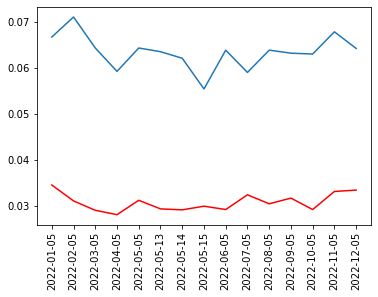

<Figure size 72000x288 with 0 Axes>

In [23]:
plt.plot(eth_pos_avg['date'],eth_pos_avg["positive"], linestyle = 'solid')
plt.plot(eth_neg_avg['date'],eth_neg_avg["negative"], linestyle = 'solid', color = "red")
plt.xticks(rotation = 90)
plt.figure().set_figwidth(1000)
plt.show()

In [65]:
X = eth_clean["Pos/Neg"]
y = eth_clean["ETH Up/Down"]

In [66]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [67]:
y_actu = y
y_pred = y_train
confusion_matrix(y_actu, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [730, 547]